# 의사결정트리
# ppt 58

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split

In [ ]:
playtennis_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/playtennis.csv'

In [ ]:
tennis_data = pd.read_csv(playtennis_path)

In [ ]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
# 스트링을 머신러닝에 사용할수없음 ->숫자로 바꾸자
tennis_data.Outlook = tennis_data.Outlook.replace("Sunny",0).replace("Overcast",1).replace("Rain",2)
tennis_data.Temperature = tennis_data.Temperature.replace("Hot",1).replace("Mild",2).replace("Cool",3)
tennis_data.Humidity = tennis_data.Humidity.replace("High",1).replace("Normal",2)
tennis_data.Wind = tennis_data.Wind.replace("Weak",1).replace("Strong",2)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace("No",1).replace("Yes",2)
tennis_data

In [ ]:
dt_clf = DecisionTreeClassifier()

- 예측에 영항을 주는 값 : 독립변수 X (Outlook,Temperature,Humidity)

- 예측하고 싶은 값 : 종속 변수 y   (yes ,no)

In [ ]:
# 종속 변수
y = tennis_data["PlayTennis"]
y

In [ ]:
# 독립변수
X = tennis_data.loc[:,'Outlook':'Wind']

In [ ]:
# 의사결정 트리 생성
# 출력되진 않고 dt_clf안에 저장
dt_clf.fit(X,y)

In [ ]:
dt_predict = dt_clf.predict(X)

In [ ]:
# 정확도 측정 (종속변수 , 예측)
accuracy_score(y,dt_predict)

1.0

In [ ]:
DecisionTreeClassifier().fit(X,y).predict(X)

array([1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1])

In [ ]:
dt_dot_data=tree.export_graphviz(dt_clf
                     ,feature_names = ['Outlook','Temperature','Humidity','Wind']
                     ,class_names = ["No","Yes"] # 종속변수 이름 써주기
                     )
# decision Tree내용이 글씨로 리턴

In [ ]:
dt_dot_data

In [ ]:
# dt_dot_data의 내용을 그림으로 바꿀 객체 생성
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

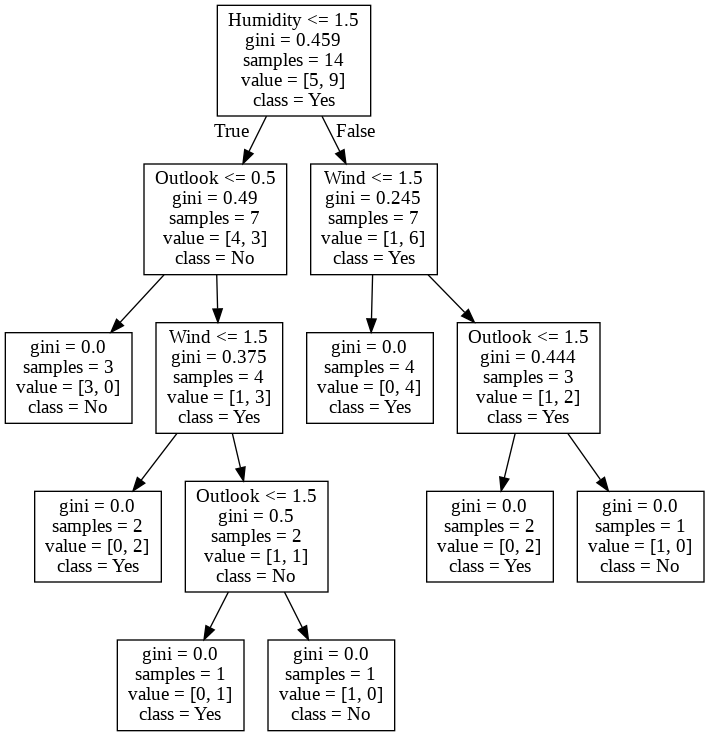

In [ ]:
Image(dt_graph.create_png())

In [ ]:
# 내가만든 Decision Tree가 잘 예측 하는가
# 일부데이터로는 트리만들고
# 일부데이터는 트리 안만들고 보관했다가 내가 만든 트리가 잘예측하나 성능 평가

In [ ]:
# 독립변수 X의 75% 
# 독립변수 X의 25%
# 종속변수 y의 75%
# 종속변수 y의 25%

train_test_split(X,y)

In [ ]:
X_train,X_test,y_train,y_test  = train_test_split(X,y)

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_prediction = dt_clf.predict(X_test)
dt_prediction

array([2, 2, 1, 2])

In [ ]:
y_test

10    2
13    1
1     1
3     2
Name: PlayTennis, dtype: int64

In [ ]:
accuracy_score(y_test, dt_prediction)

0.75

In [ ]:
tennis_data.columns.tolist()[0:4]

['Outlook', 'Temperature', 'Humidity', 'Wind']

# 실습

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
playtennis_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/playtennis.csv'
tennis_data = pd.read_csv(playtennis_path)

In [ ]:
tennis_data.Outlook = tennis_data.Outlook.replace("Sunny",0).replace("Overcast",1).replace("Rain",2)
tennis_data.Temperature = tennis_data.Temperature.replace("Hot",1).replace("Mild",2).replace("Cool",3)
tennis_data.Humidity = tennis_data.Humidity.replace("High",1).replace("Normal",2)
tennis_data.Wind = tennis_data.Wind.replace("Weak",1).replace("Strong",2)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace("No",1).replace("Yes",2)

In [ ]:
tennis_data

In [ ]:
X = np.array(pd.DataFrame(tennis_data,columns = ['Outlook','Temperature','Humidity','Wind']))
y = np.array(pd.DataFrame(tennis_data,columns = ['PlayTennis']))

In [ ]:
X_train,X_test,y_train,y_test =  train_test_split(X,y)

In [ ]:
# 의사결정 분류기 하나 불러오기
dt_clf = DecisionTreeClassifier()

# 불러온 분류기에 내 데이터 적용
dt_clf = dt_clf.fit(X_train,y_train)

# 분류기로 X_test 넣어서 예측 
dt_prediction =  dt_clf.predict(X_test)

# 예측값과 정답값(y_test) 정확도 비교
accuracy = accuracy_score(y_test,dt_prediction)
print("정확도" ,accuracy)

In [ ]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]
target_name = np.array(['Play No','Play Yes'])

In [ ]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True
                                   )

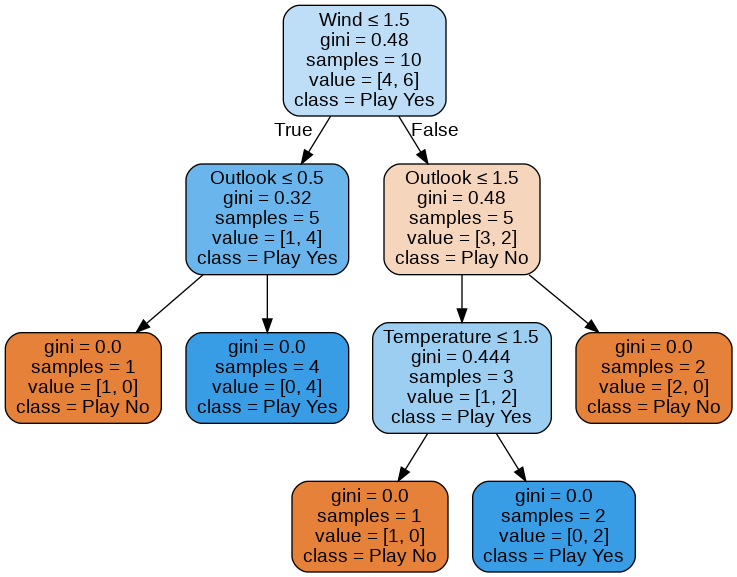

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())